In [24]:
df = pd.read_csv('C:/Users/rahim/Downloads/customer_segmentation_data.csv')
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [26]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [28]:
# Summary statistics
df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [34]:
print(df.columns.tolist())

['Customer ID', 'Age', 'Gender', 'Marital Status', 'Education Level', 'Geographic Information', 'Occupation', 'Income Level', 'Behavioral Data', 'Purchase History', 'Interactions with Customer Service', 'Insurance Products Owned', 'Coverage Amount', 'Premium Amount', 'Policy Type', 'Customer Preferences', 'Preferred Communication Channel', 'Preferred Contact Time', 'Preferred Language', 'Segmentation Group']


In [36]:
# Select numerical features
features = ['Age', 'Income Level']
X = df[features]

In [46]:
from sklearn.preprocessing import StandardScaler

# Define numerical features
features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']

# Subset and drop missing values
X = df[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [48]:
import pandas as pd

# Show first few rows of the scaled data
pd.DataFrame(X_scaled, columns=features).head()

,Age,Income Level,Coverage Amount,Premium Amount
0,-1.401980,-0.333617,-0.469361,-0.213640
1,-1.203033,-0.780348,1.071729,-0.822588
2,-1.004085,-0.241996,1.048219,1.080474
3,-1.600928,-0.528975,1.099966,1.025256
4,-1.269349,-1.199821,-0.469722,-1.359210


In [50]:
from sklearn.cluster import KMeans

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Check the clustered data
df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount', 'Cluster']].head()

,Age,Income Level,Coverage Amount,Premium Amount,Cluster
0,23,70541,366603,2749,1
1,26,54168,780236,1966,2
2,29,73899,773926,4413,1
3,20,63381,787815,4342,1
4,25,38794,366506,1276,2


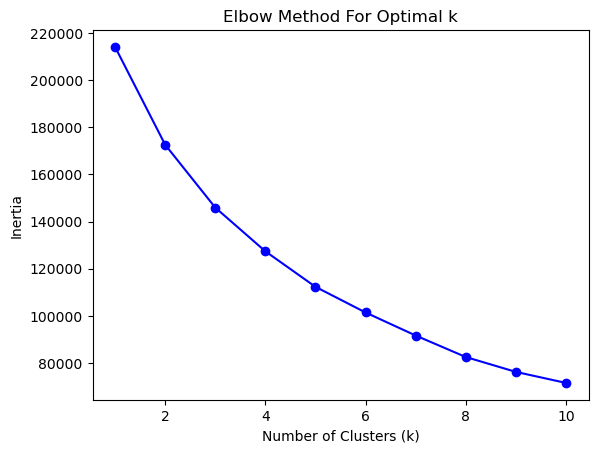

In [54]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [56]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [58]:
df['Cluster'].value_counts()

Cluster
2    13577
3    13536
1    13228
0    13162
Name: count, dtype: int64

In [60]:
df.groupby('Cluster')[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']].mean()

,Age,Income Level,Coverage Amount,Premium Amount
Cluster,,,,
0,33.599681,121729.022793,462271.731576,3151.566555
1,35.308210,52435.529483,498412.998261,3887.948065
2,45.481844,66567.815865,515044.475952,1443.018266
3,61.677748,90776.288268,493821.178044,3640.262781


In [62]:
cluster_labels = {
    0: 'High-Value',
    1: 'Low-Value',
    2: 'Frequent Buyers',
    3: 'Price Sensitive'
}

df['Segment'] = df['Cluster'].map(cluster_labels)

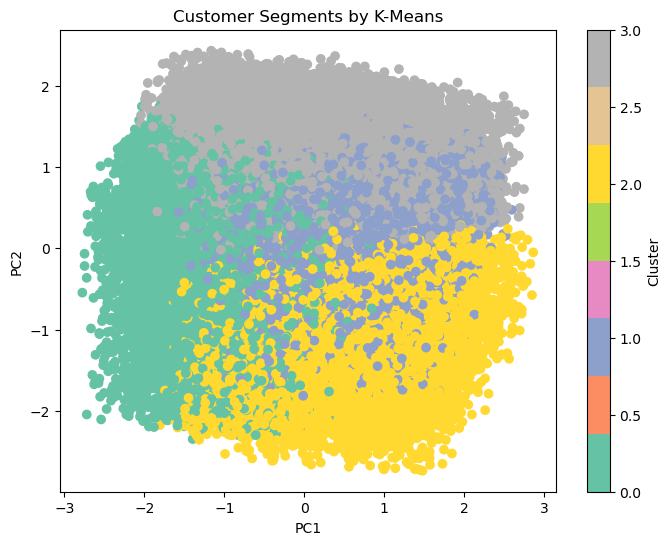

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
plt.scatter(df['PC1'], df['PC2'], c=df['Cluster'], cmap='Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Segments by K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

features = ['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']
target = 'Purchase History'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [85]:
df['Purchase History'] = pd.to_datetime(df['Purchase History'], format='mixed', errors='coerce')

In [87]:
latest_date = df['Purchase History'].max()
df['Days Since Purchase'] = (latest_date - df['Purchase History']).dt.days

In [89]:
X = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]  # Adjust as needed
y = df['Days Since Purchase']

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print("MSE:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

MSE: 813622.9770114942
R^2 Score: -1.02904238415407


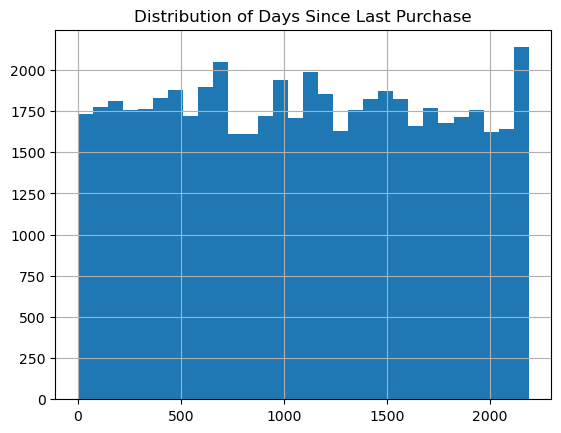

In [94]:
import matplotlib.pyplot as plt
df['Days Since Purchase'].hist(bins=30)
plt.title('Distribution of Days Since Last Purchase')
plt.show()

In [96]:
df_encoded = pd.get_dummies(df[['Gender', 'Marital Status', 'Education Level', 'Occupation']], drop_first=True)
X = pd.concat([X, df_encoded], axis=1)

In [98]:
df['Will Purchase Soon'] = df['Days Since Purchase'] <= 30

In [100]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 902.0105193463623


In [102]:
df['Will Purchase Soon'] = df['Days Since Purchase'] <= 30

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Select features and target
X = df[['Age', 'Income Level', 'Coverage Amount', 'Premium Amount']]  # Add more if needed
y = df['Will Purchase Soon']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9860760676572283
Precision: 0.0
Recall: 0.0
Confusion Matrix:
 [[10552     0]
 [  149     0]]


C:\Users\rahim\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
